In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [24]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
print("GOKULNAATH M\n 24BAD026")

GOKULNAATH M
 24BAD026


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:

df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [5]:
df.shape

(5572, 2)

In [6]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [8]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

In [9]:
df['clean_message'] = df['message'].apply(clean_text)

In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_message'])

In [11]:
le = LabelEncoder()
y = le.fit_transform(df['label'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 0.968609865470852
Precision: 1.0
Recall   : 0.7666666666666667
F1 Score : 0.8679245283018868


In [16]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



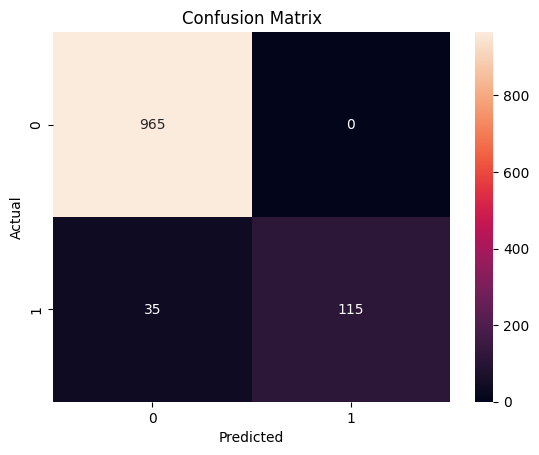

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
misclassified = df_test[y_test != y_pred]

print("Number of Misclassified Messages:", misclassified.shape[0])
print("\nSome Misclassified Examples:\n")
print(misclassified[['label', 'message']].head())

Number of Misclassified Messages: 35

Some Misclassified Examples:

     label                                            message
1044  spam  We know someone who you know that fancies you....
683   spam  Hi I'm sue. I am 20 years old and work as a la...
4071  spam  Loans for any purpose even if you have Bad Cre...
2312  spam  tddnewsletter@emc1.co.uk (More games from TheD...
3979  spam                                 ringtoneking 84484


In [19]:
model_no_smooth = MultinomialNB(alpha=0.0)
model_no_smooth.fit(X_train, y_train)
y_pred_no = model_no_smooth.predict(X_test)

print("\nAccuracy without smoothing:",
      accuracy_score(y_test, y_pred_no))

print("Accuracy with smoothing:",
      accuracy_score(y_test, y_pred))


Accuracy without smoothing: 0.9318385650224216
Accuracy with smoothing: 0.968609865470852


/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


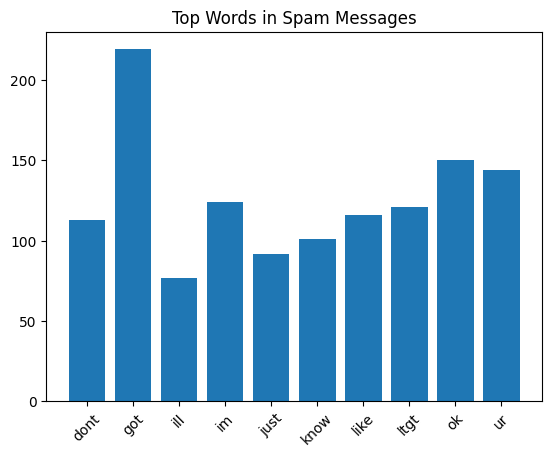

In [20]:
spam_words = df[df['label']=='spam']['clean_message']
ham_words = df[df['label']=='ham']['clean_message']

vectorizer2 = CountVectorizer(stop_words='english', max_features=10)

spam_matrix = vectorizer2.fit_transform(spam_words)
spam_freq = np.sum(spam_matrix.toarray(), axis=0)

ham_matrix = vectorizer2.fit_transform(ham_words)
ham_freq = np.sum(ham_matrix.toarray(), axis=0)

plt.figure()
plt.bar(vectorizer2.get_feature_names_out(), spam_freq)
plt.title("Top Words in Spam Messages")
plt.xticks(rotation=45)
plt.show()


In [21]:
print("Feature names:", len(vectorizer.get_feature_names_out()))
print("Model features:", model.feature_log_prob_.shape[1])

Feature names: 8323
Model features: 8323
